In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

import warnings
# Suppress warnings if needed
warnings.filterwarnings(action="ignore")

In [ ]:
# Loading the dataset
file_path = '/content/drive/MyDrive/MLDM TASK 2/codon_usage.csv'
codon_data = pd.read_csv(file_path)
codon_data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [ ]:
codon_data.shape

(13028, 69)

In [ ]:
# Display basic information about the dataset
codon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

### Discriptive Statistics

In [ ]:
# Descriptive statistics
codon_descriptive_stats = codon_data.describe().T
print(codon_descriptive_stats)

             count           mean            std     min           25%  \
DNAtype    13028.0       0.367209       0.688726     0.0      0.000000   
SpeciesID  13028.0  130451.105926  124787.086107     7.0  28850.750000   
Ncodons    13028.0   79605.761283  719700.970711  1000.0   1602.000000   
UUA        13028.0       0.020637       0.020709     0.0      0.005610   
UUG        13028.0       0.014104       0.009280     0.0      0.007108   
...            ...            ...            ...     ...           ...   
GAA        13028.0       0.028290       0.014342     0.0      0.017360   
GAG        13028.0       0.021683       0.015018     0.0      0.009710   
UAA        13028.0       0.001645       0.001834     0.0      0.000560   
UAG        13028.0       0.000592       0.000907     0.0      0.000000   
UGA        13028.0       0.006178       0.010344     0.0      0.000410   

                    50%            75%           max  
DNAtype        0.000000       1.000000  1.200000e+01  
S

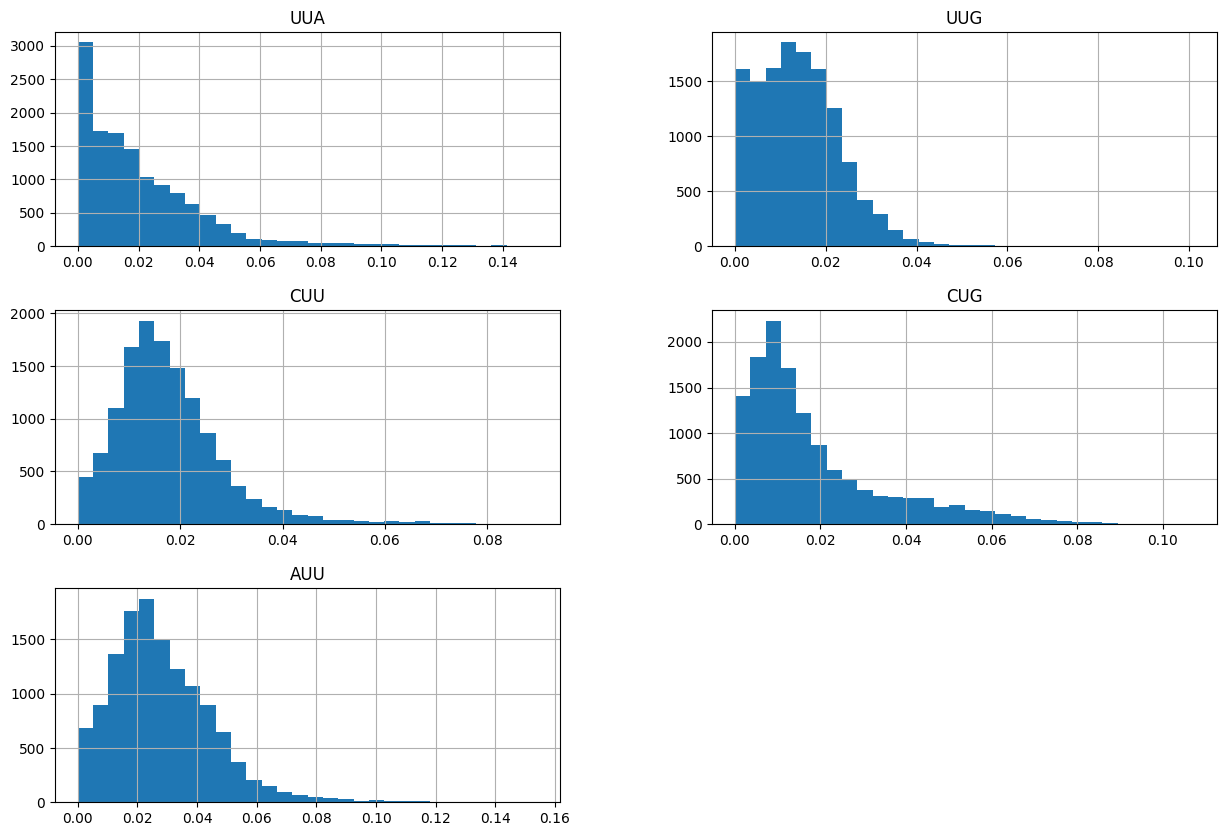

In [ ]:
# Histograms for a selection of codons to understand distributions
codon_data[['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUG', 'AUU']].hist(bins=30, figsize=(15, 10))
plt.show()

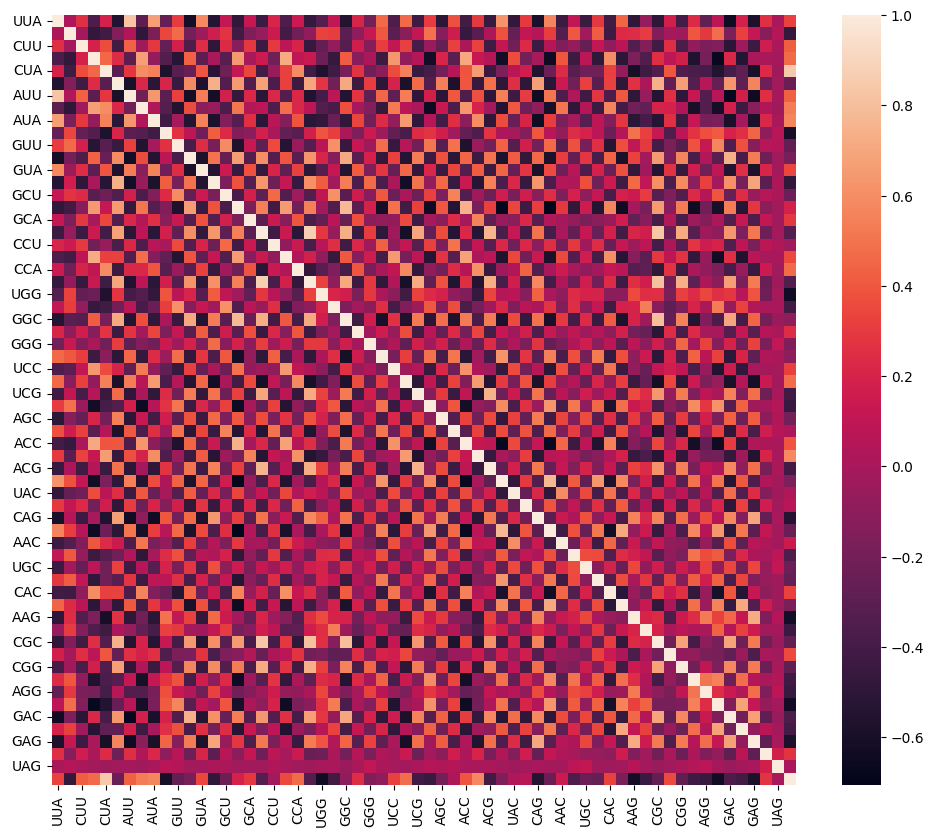

In [ ]:
# Correlation matrix and heatmap to understand relationships between features
correlation_matrix = codon_data.iloc[:, 5:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix)
plt.show()

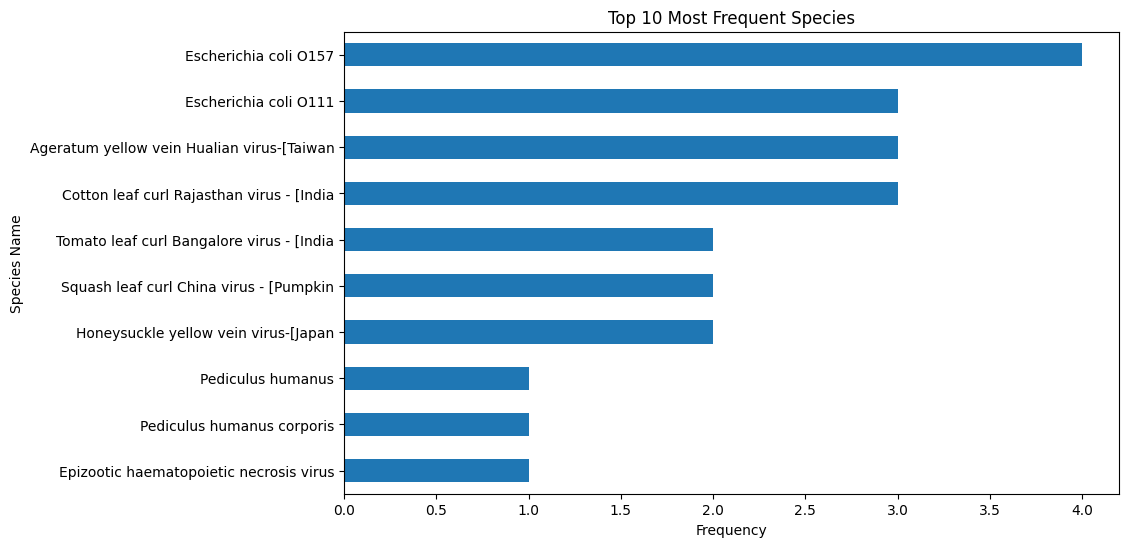

In [ ]:
# Top 10 most frequent species
species_frequency = codon_data['SpeciesName'].value_counts().head(10)
species_frequency.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Most Frequent Species')
plt.xlabel('Frequency')
plt.ylabel('Species Name')
# Invert the y-axis to have the highest frequency at the top
plt.gca().invert_yaxis()
# Display the plot
plt.show()

In [ ]:
# Splitting the names into genus and species (assuming binomial nomenclature)
split_names = codon_data['SpeciesName'].str.split(' ', expand=True)
genus_counts = split_names[0].value_counts()  # Frequency of each genus
genus_counts

mitochondrion        2899
chloroplast           816
Human                 388
Streptomyces          186
Tomato                154
                     ... 
Methanohalophilus       1
Paulownia               1
Methylocella            1
Maricaulis              1
Homo                    1
Name: 0, Length: 3051, dtype: int64

### Data preprocessing

In [ ]:
# Convert all columns to numeric, coercing errors to NaN
for col in codon_data.columns[5:]:
    codon_data[col] = pd.to_numeric(codon_data[col], errors='coerce')

# Handle NaN values by filling with the mean of each column
codon_data.fillna(codon_data.mean(), inplace=True)

# Standardize features before clustering or PCA
scaler = StandardScaler()
codon_features_scaled = scaler.fit_transform(codon_data.iloc[:, 5:])

### Feature Extraction using PCA

In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
codon_features_pca = pca.fit_transform(codon_features_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.29817815 0.18610395]


### Pair Plot

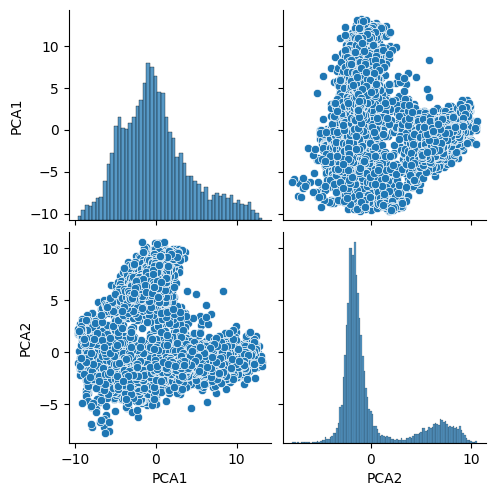

In [ ]:
pca_df = pd.DataFrame(codon_features_pca, columns=['PCA1', 'PCA2'])
# Generate a pairplot
sns.pairplot(pca_df)
plt.show()

### Determining the Optimal number of Clusters

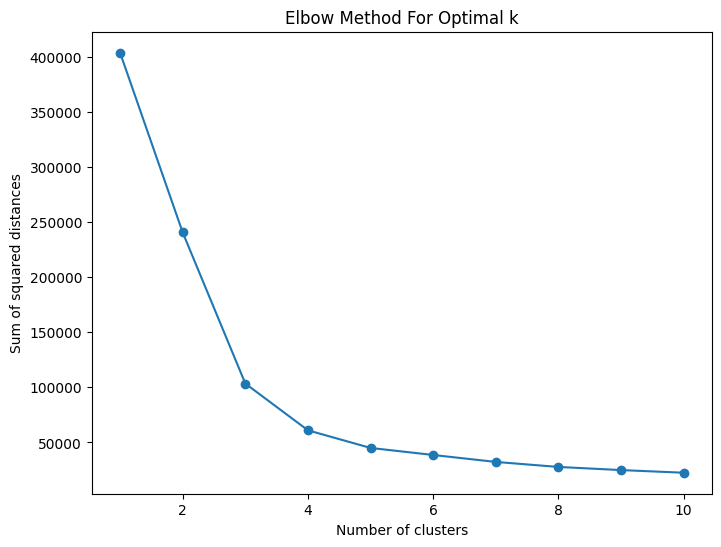

In [ ]:
# Elbow method to determine the optimal number of clusters
range_clusters = range(1, 11)  # Trying 1 to 10 clusters
sum_squared_distances = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(codon_features_pca)
    sum_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_clusters, sum_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

### Silhouette Analysis to Validate the number of clusters

For n_clusters = 2 The average silhouette_score is : 0.19499251391882202
For n_clusters = 3 The average silhouette_score is : 0.2508660615909439
For n_clusters = 4 The average silhouette_score is : 0.20051833284158094
For n_clusters = 5 The average silhouette_score is : 0.1616070171805507
For n_clusters = 6 The average silhouette_score is : 0.1607427016324232


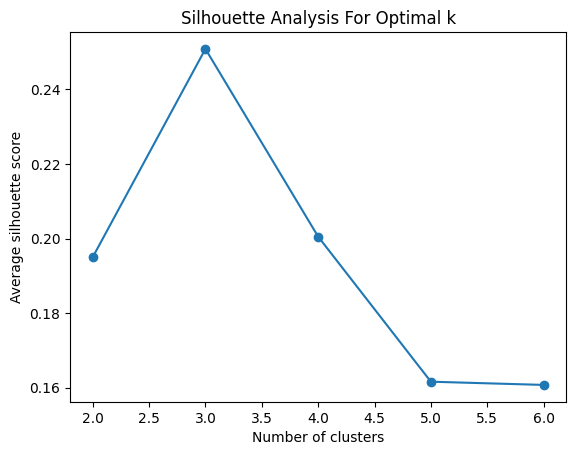

In [ ]:
# Silhouette analysis for validation of the number of clusters
range_n_clusters = [2, 3, 4, 5, 6]  # Example for checking silhouette scores for 2 to 6 clusters
silhouette_avg_scores = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(codon_features_scaled)
    silhouette_avg = silhouette_score(codon_features_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

### Algorithm 1: K-Means Clustering

In [ ]:
pca_df

,PCA1,PCA2
0,5.883305,-0.539486
1,5.394105,-0.659652
2,-0.308945,-2.483326
3,-1.593226,-2.010762
4,-1.027570,-4.999264
...,...,...
13023,1.511818,-1.139719
13024,1.315025,7.163548
13025,1.493549,8.240477
13026,2.394798,-1.303341


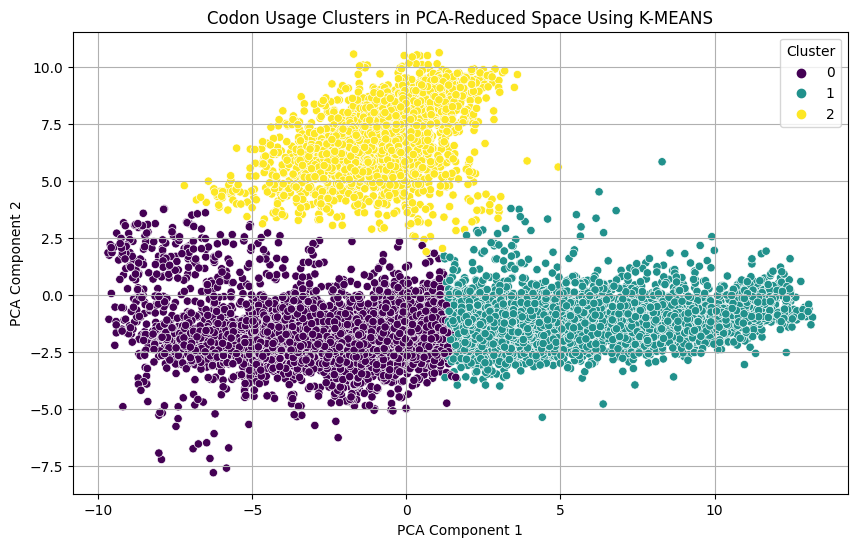

In [ ]:
# KMeans clustering with the determined optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
k_clusters = kmeans.fit_predict(codon_features_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(codon_features_pca, columns=['PCA1', 'PCA2'])
# Add the cluster labels to this DataFrame
pca_df['Cluster'] = k_clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('Codon Usage Clusters in PCA-Reduced Space Using K-MEANS')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
pca_df

,PCA1,PCA2,Cluster
0,5.883305,-0.539486,1
1,5.394105,-0.659652,1
2,-0.308945,-2.483326,0
3,-1.593226,-2.010762,0
4,-1.027570,-4.999264,0
...,...,...,...
13023,1.511818,-1.139719,1
13024,1.315025,7.163548,2
13025,1.493549,8.240477,2
13026,2.394798,-1.303341,1


In [ ]:
# Count the number of data points in each cluster
cluster_distribution = pca_df['Cluster'].value_counts()

# Display the cluster distribution
print(cluster_distribution)

0    6866
1    3792
2    2370
Name: Cluster, dtype: int64


In [ ]:
# For K-Means Clustering
codon_data_k = codon_data.copy()
codon_data_k['KMeans_Cluster'] = k_clusters
kmeans_cluster_groups = codon_data_k.groupby('KMeans_Cluster')
kmeans_cluster_means = kmeans_cluster_groups.mean()
print(kmeans_cluster_means)


                 DNAtype      SpeciesID        Ncodons       UUU       UUC  \
KMeans_Cluster                                                               
0               0.348675  135636.888727   64187.201136  0.031965  0.017495   
1               0.008966  113342.505802  152293.824367  0.011886  0.026431   
2               0.994093  142801.412658    7973.144726  0.024801  0.035886   

                     UUA       UUG       CUU       CUC       CUA  ...  \
KMeans_Cluster                                                    ...   
0               0.027424  0.018585  0.018170  0.009317  0.011053  ...   
1               0.003644  0.012004  0.010644  0.023920  0.004619  ...   
2               0.028163  0.004485  0.028287  0.035266  0.065275  ...   

                     CGG       AGA       AGG       GAU       GAC       GAA  \
KMeans_Cluster                                                               
0               0.003658  0.015473  0.008139  0.033188  0.016410  0.036027   
1        

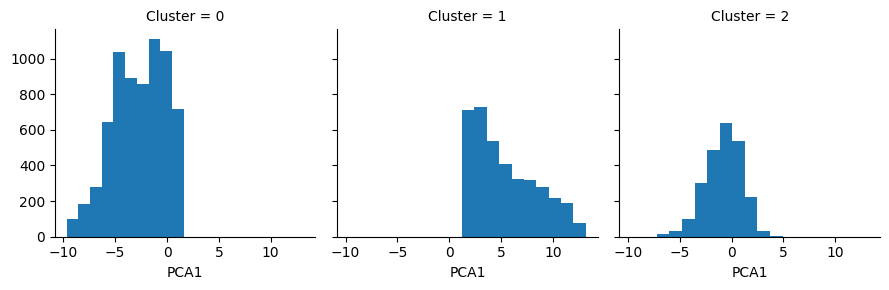

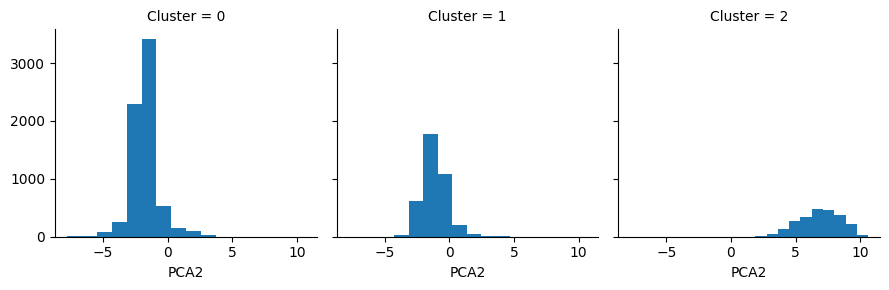

In [ ]:
# Visualize the distribution of PCA components for each cluster
for c in ['PCA1', 'PCA2']:  # Loop through each PCA component
    grid = sns.FacetGrid(pca_df, col='Cluster')
    grid.map(plt.hist, c)

### Algorithm 2: Heirachical Clustering

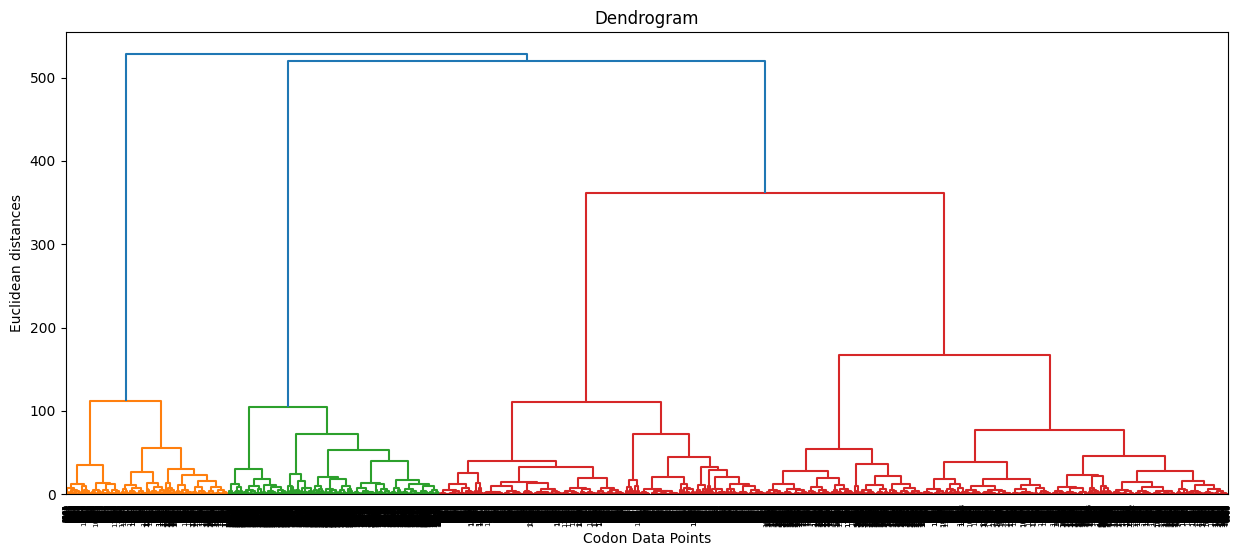

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(codon_features_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Codon Data Points')
plt.ylabel('Euclidean distances')
plt.show()


###  Fitting Hierarchical Clustering to the Dataset

In [ ]:
# Using the number of clusters determined from the dendrogram
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(codon_features_pca)

### Visualizing the Clusters

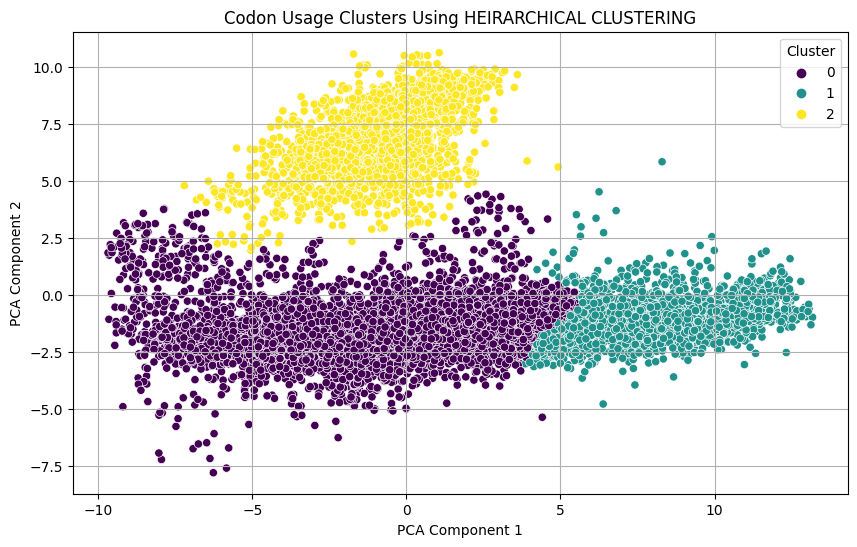

In [ ]:
# Convert the numpy array to a DataFrame
codon_features_df = pd.DataFrame(codon_features_pca, columns=['PCA1', 'PCA2'])

codon_features_df['Cluster'] = y_hc

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis',
    data=codon_features_df)
plt.title('Codon Usage Clusters Using HEIRARCHICAL CLUSTERING')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
# For Heirarchical Clustering
codon_data_h = codon_data.copy()
codon_data_h['H_Cluster'] = y_hc
h_cluster_groups = codon_data_h.groupby('H_Cluster')
h_cluster_means = h_cluster_groups.mean()
print(h_cluster_means)

            DNAtype      SpeciesID        Ncodons       UUU       UUC  \
H_Cluster                                                               
0          0.274465  127062.077950   80117.609119  0.028336  0.019099   
1          0.000000  130414.582694  169797.008762  0.007402  0.028503   
2          0.997884  143156.272958    7996.179856  0.025116  0.035774   

                UUA       UUG       CUU       CUC       CUA  ...       CGG  \
H_Cluster                                                    ...             
0          0.022481  0.017684  0.017212  0.011882  0.010059  ...  0.004444   
1          0.001453  0.009248  0.007252  0.027655  0.002427  ...  0.015734   
2          0.028563  0.004468  0.028263  0.035010  0.065496  ...  0.001290   

                AGA       AGG       GAU       GAC       GAA       GAG  \
H_Cluster                                                               
0          0.013896  0.008369  0.030924  0.019223  0.033391  0.022890   
1          0.002449  0.0

In [ ]:
# Create a DataFrame with PCA components
pca_df2 = pd.DataFrame(codon_features_pca, columns=['PCA1', 'PCA2'])

## Add hierarchical clustering labels to the PCA DataFrame
pca_df2['Cluster'] = y_hc

# Display the first few rows
pca_df2

,PCA1,PCA2,Cluster
0,5.883305,-0.539486,1
1,5.394105,-0.659652,0
2,-0.308945,-2.483326,0
3,-1.593226,-2.010762,0
4,-1.027570,-4.999264,0
...,...,...,...
13023,1.511818,-1.139719,0
13024,1.315025,7.163548,2
13025,1.493549,8.240477,2
13026,2.394798,-1.303341,0


In [ ]:
# Count the number of data points in each cluster
cluster_distribution2 = pca_df2['Cluster'].value_counts()

# Display the cluster distribution
print(cluster_distribution2)

0    8839
2    2363
1    1826
Name: Cluster, dtype: int64


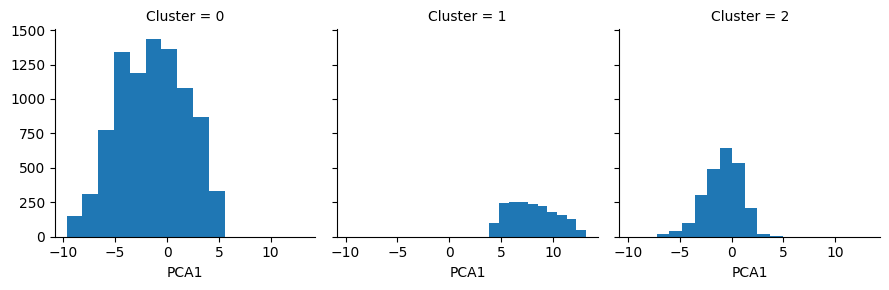

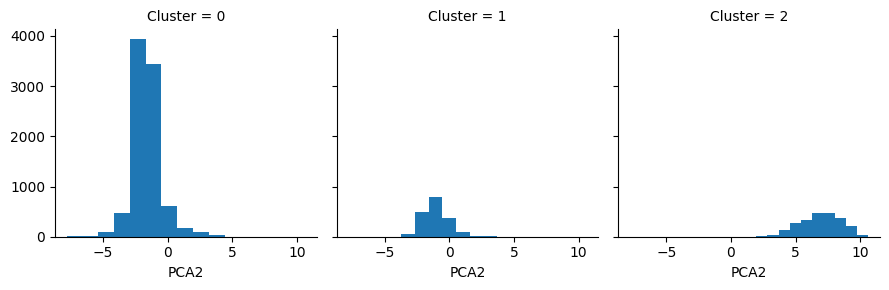

In [ ]:
# Visualize the distribution of PCA components for each hierarchical cluster
for c in ['PCA1', 'PCA2']:  # Looping through each PCA component
    grid = sns.FacetGrid(pca_df2, col='Cluster')
    grid.map(plt.hist, c)


### UPDATED ORIGINAL DATAFRAME WITH THE NEW LABELS

In [ ]:
# Add both Hierarchical clustering and K-Means clustering labels to the DataFrame
updated_dataframe = pd.concat([codon_data, pd.DataFrame({'H_cluster': y_hc, 'KMeans_Cluster': k_clusters})], axis=1)

# Display the updated DataFrame
updated_dataframe


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,H_cluster,KMeans_Cluster
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,1,1
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,0,1
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,0,0
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,0,0
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638,0,1
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887,2,2
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017,2,2
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156,0,1


### DETAILED COMPARISON BETWEEN K-MEANS AND HEIRARCHICAL CLUSTERING ALGORITHMS RESULTS

In [ ]:
# Cross-tabulation of the two clustering methods
cross_tab = pd.crosstab(updated_dataframe['H_cluster'], updated_dataframe['KMeans_Cluster'])
print(cross_tab)


KMeans_Cluster     0     1     2
H_cluster                       
0               6849  1966    24
1                  0  1826     0
2                 17     0  2346


In [ ]:
codon_columns = updated_dataframe.columns[5:]

# Now calculate the mean codon usage for each cluster
mean_codon_usage_h = updated_dataframe.groupby('H_cluster')[codon_columns].mean()
mean_codon_usage_kmeans = updated_dataframe.groupby('KMeans_Cluster')[codon_columns].mean()

print("Mean Codon Usage in Hierarchical Clustering")
print(mean_codon_usage_h)
print("\nMean Codon Usage in KMeans Clustering")
print(mean_codon_usage_kmeans)


Mean Codon Usage in Hierarchical Clustering
                UUU       UUC       UUA       UUG       CUU       CUC  \
H_cluster                                                               
0          0.028336  0.019099  0.022481  0.017684  0.017212  0.011882   
1          0.007402  0.028503  0.001453  0.009248  0.007252  0.027655   
2          0.025116  0.035774  0.028563  0.004468  0.028263  0.035010   

                CUA       CUG       AUU       AUC  ...       AGG       GAU  \
H_cluster                                          ...                       
0          0.010059  0.014881  0.029401  0.018337  ...  0.008369  0.030924   
1          0.002427  0.046250  0.008247  0.033328  ...  0.005025  0.015438   
2          0.065496  0.010320  0.039962  0.043716  ...  0.000219  0.005697   

                GAC       GAA       GAG       UAA       UAG       UGA  \
H_cluster                                                               
0          0.019223  0.033391  0.022890  0.001602  0.